In [24]:
import numpy as np
import pandas as pd


# Monkey patch numpy to add np.float_ as an alias to np.float64
np.float_ = np.float64

# Now import Prophet
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly




In [57]:
train_path = '../data/clean/train.csv'
df = pd.read_csv(train_path)
df.head()

,date,open,high,low,close,volume,change,changePercent,vwap,rsi,adx,standardDeviation,ratingScore,target
0,2019-06-28,23.45,23.45,22.67,22.78,47733000.0,-0.67,-2.8600,22.97,58.965646,102.767512,0.898712,4,23.78
1,2019-06-29,23.45,23.45,22.67,22.78,47733000.0,-0.67,-2.8600,22.97,58.965646,102.767512,0.898712,4,23.78
2,2019-06-30,23.45,23.45,22.67,22.78,47733000.0,-0.67,-2.8600,22.97,58.965646,102.767512,0.898712,4,23.78
3,2019-07-01,23.60,23.94,22.97,23.38,12103000.0,-0.22,-0.9322,23.43,62.959665,99.734268,0.877744,4,23.97
4,2019-07-02,22.91,23.44,22.58,23.42,13069000.0,0.51,2.2300,23.15,63.216708,96.577138,0.883491,4,24.12


In [58]:
df['ds'] = pd.to_datetime(df.date)
df['y'] = df.target

df

,date,open,high,low,close,volume,change,changePercent,vwap,rsi,adx,standardDeviation,ratingScore,target,ds,y
0,2019-06-28,23.45,23.45,22.67,22.78,47733000.0,-0.67,-2.8600,22.9700,58.965646,102.767512,0.898712,4,23.78,2019-06-28,23.78
1,2019-06-29,23.45,23.45,22.67,22.78,47733000.0,-0.67,-2.8600,22.9700,58.965646,102.767512,0.898712,4,23.78,2019-06-29,23.78
2,2019-06-30,23.45,23.45,22.67,22.78,47733000.0,-0.67,-2.8600,22.9700,58.965646,102.767512,0.898712,4,23.78,2019-06-30,23.78
3,2019-07-01,23.60,23.94,22.97,23.38,12103000.0,-0.22,-0.9322,23.4300,62.959665,99.734268,0.877744,4,23.97,2019-07-01,23.97
4,2019-07-02,22.91,23.44,22.58,23.42,13069000.0,0.51,2.2300,23.1500,63.216708,96.577138,0.883491,4,24.12,2019-07-02,24.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1813,2024-06-14,95.07,95.75,94.68,95.66,2012934.0,0.59,0.6206,95.2900,56.114533,14.486564,1.723226,3,97.71,2024-06-14,97.71
1814,2024-06-15,95.07,95.75,94.68,95.66,2012934.0,0.59,0.6206,95.2900,56.114533,14.486564,1.723226,3,97.71,2024-06-15,97.71
1815,2024-06-16,95.07,95.75,94.68,95.66,2012934.0,0.59,0.6206,95.2900,56.114533,14.486564,1.723226,3,97.71,2024-06-16,97.71
1816,2024-06-17,95.25,99.03,94.66,97.68,3162510.0,2.43,2.5500,96.6550,59.795902,15.157753,1.878247,3,95.76,2024-06-17,95.76


In [59]:
m = Prophet()
m.fit(df)

16:05:31 - cmdstanpy - INFO - Chain [1] start processing
16:05:32 - cmdstanpy - INFO - Chain [1] done processing


In [60]:
#future = df.copy()
future = m.make_future_dataframe(periods=14)
future.tail()

,ds
1827,2024-06-28
1828,2024-06-29
1829,2024-06-30
1830,2024-07-01
1831,2024-07-02


In [61]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1827,2024-06-28,92.586946,84.078850,101.091800
1828,2024-06-29,92.695923,83.749866,101.575753
1829,2024-06-30,92.813176,84.518813,101.286164
1830,2024-07-01,92.957113,84.916085,101.159110
1831,2024-07-02,93.259311,84.335611,101.775943


/Users/anthonydillon/Ironhack/wk8/project/venv-final-project/lib/python3.9/site-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/Users/anthonydillon/Ironhack/wk8/project/venv-final-project/lib/python3.9/site-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



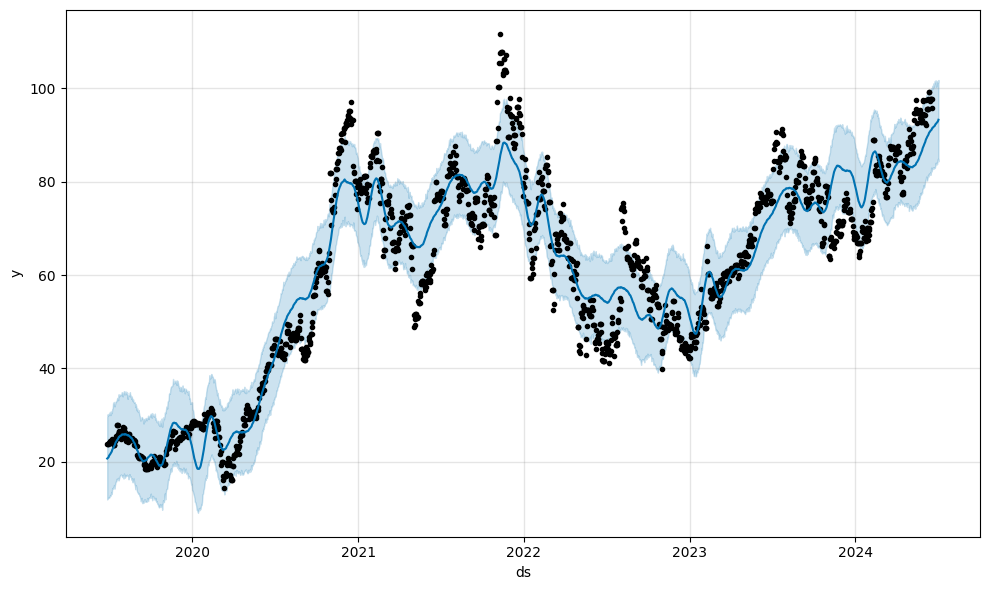

In [62]:
fig1 = m.plot(forecast)

/Users/anthonydillon/Ironhack/wk8/project/venv-final-project/lib/python3.9/site-packages/prophet/plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/Users/anthonydillon/Ironhack/wk8/project/venv-final-project/lib/python3.9/site-packages/prophet/plot.py:351: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/Users/anthonydillon/Ironhack/wk8/project/venv-final-project/lib/python3.9/site-packages/prophet/plot.py:354: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. 

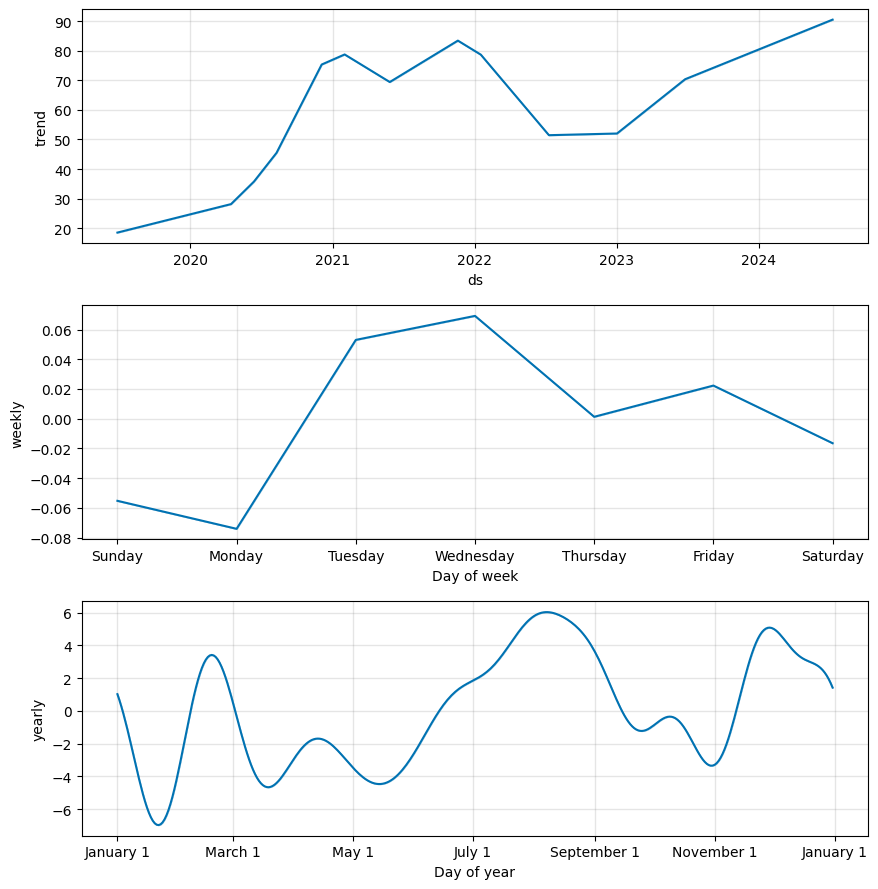

In [55]:
fig2 = m.plot_components(forecast)

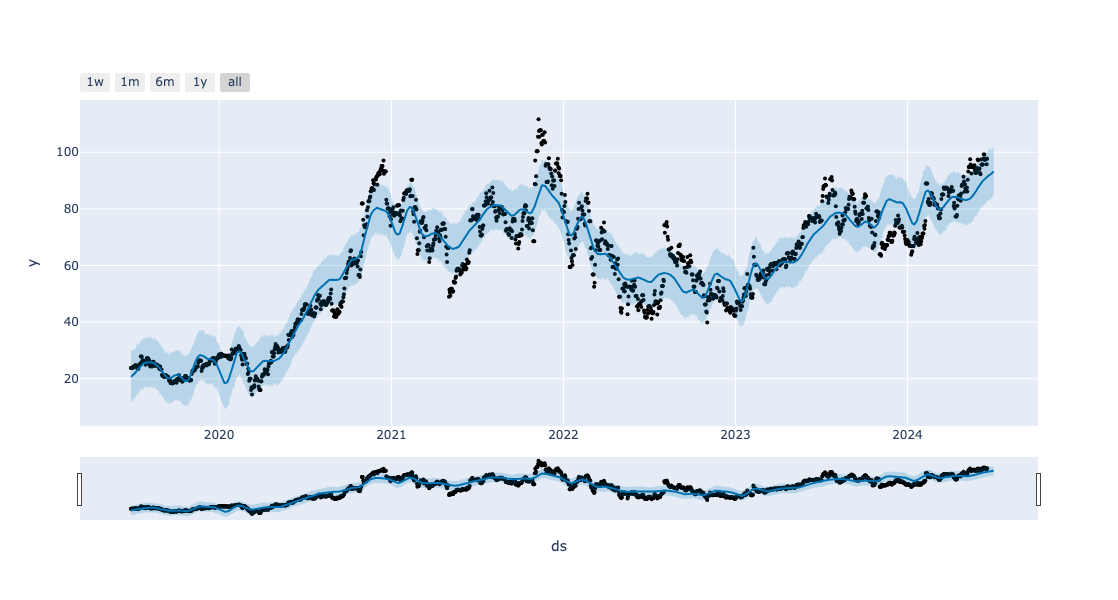

In [63]:
plot_plotly(m, forecast)